In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [3]:
%pip install xgboost
import xgboost as xgb

In [4]:
df = pd.read_csv("E:\\Backup F4 26.04.2023\\Downloads\\indian_liver_patient - indian_liver_patient.csv")

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.shape

(583, 11)

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
# Load dataset
#df = pd.read_csv("kidney_disease - kidney_disease.csv")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numerical NaN values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# (Optional) Check if all NaNs are removed
print(df.isna().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [12]:
obj_dt = df.select_dtypes(include = 'object')
obj_dt.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_dt.columns:
  df[i] = le.fit_transform(df[i])

In [14]:
display(df)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [15]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

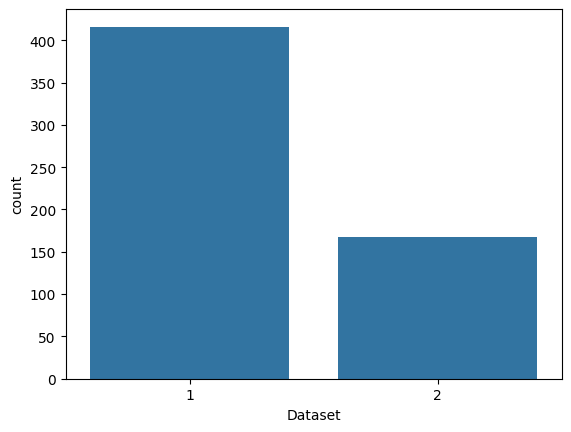

In [16]:
sns.countplot(x='Dataset', data=df)
plt.show()

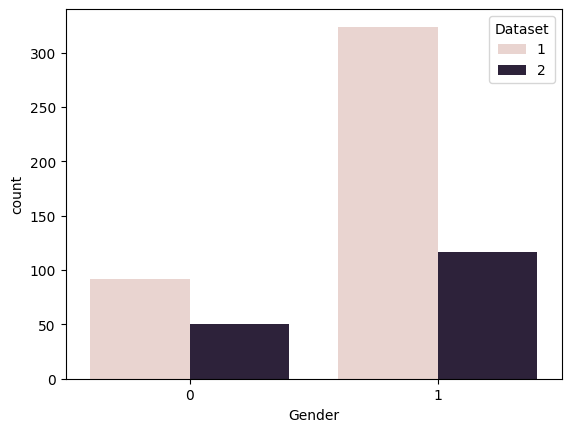

Dataset
1    416
2    167
Name: count, dtype: int64


In [17]:
sns.countplot(x='Gender', data=df, hue = 'Dataset')
plt.show()
print(df['Dataset'].value_counts())

<Axes: >

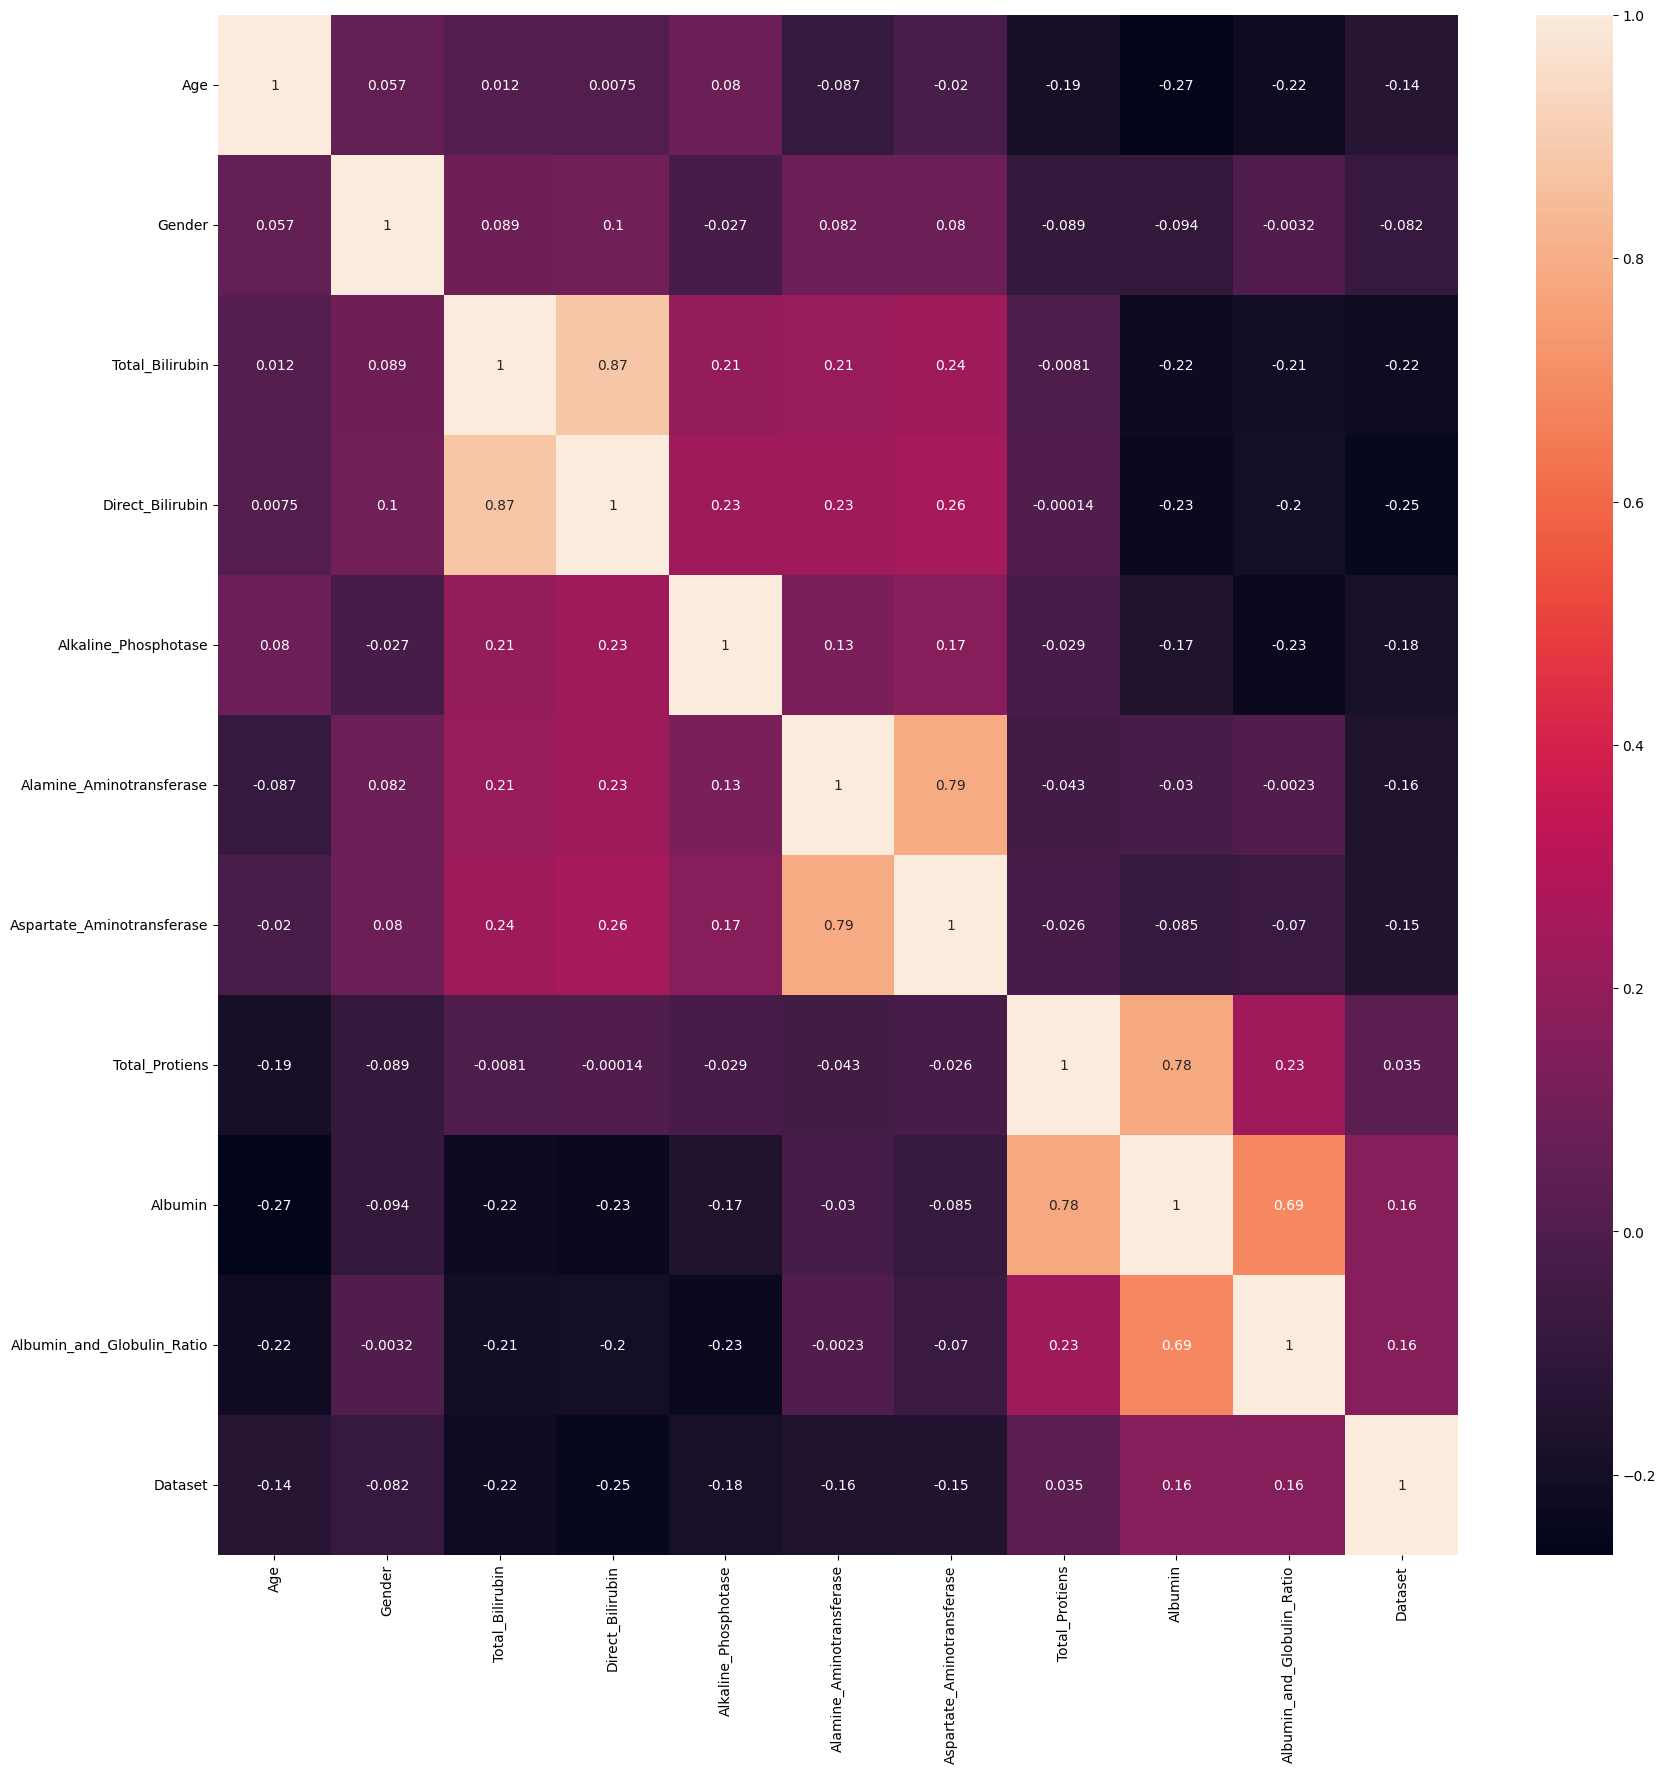

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

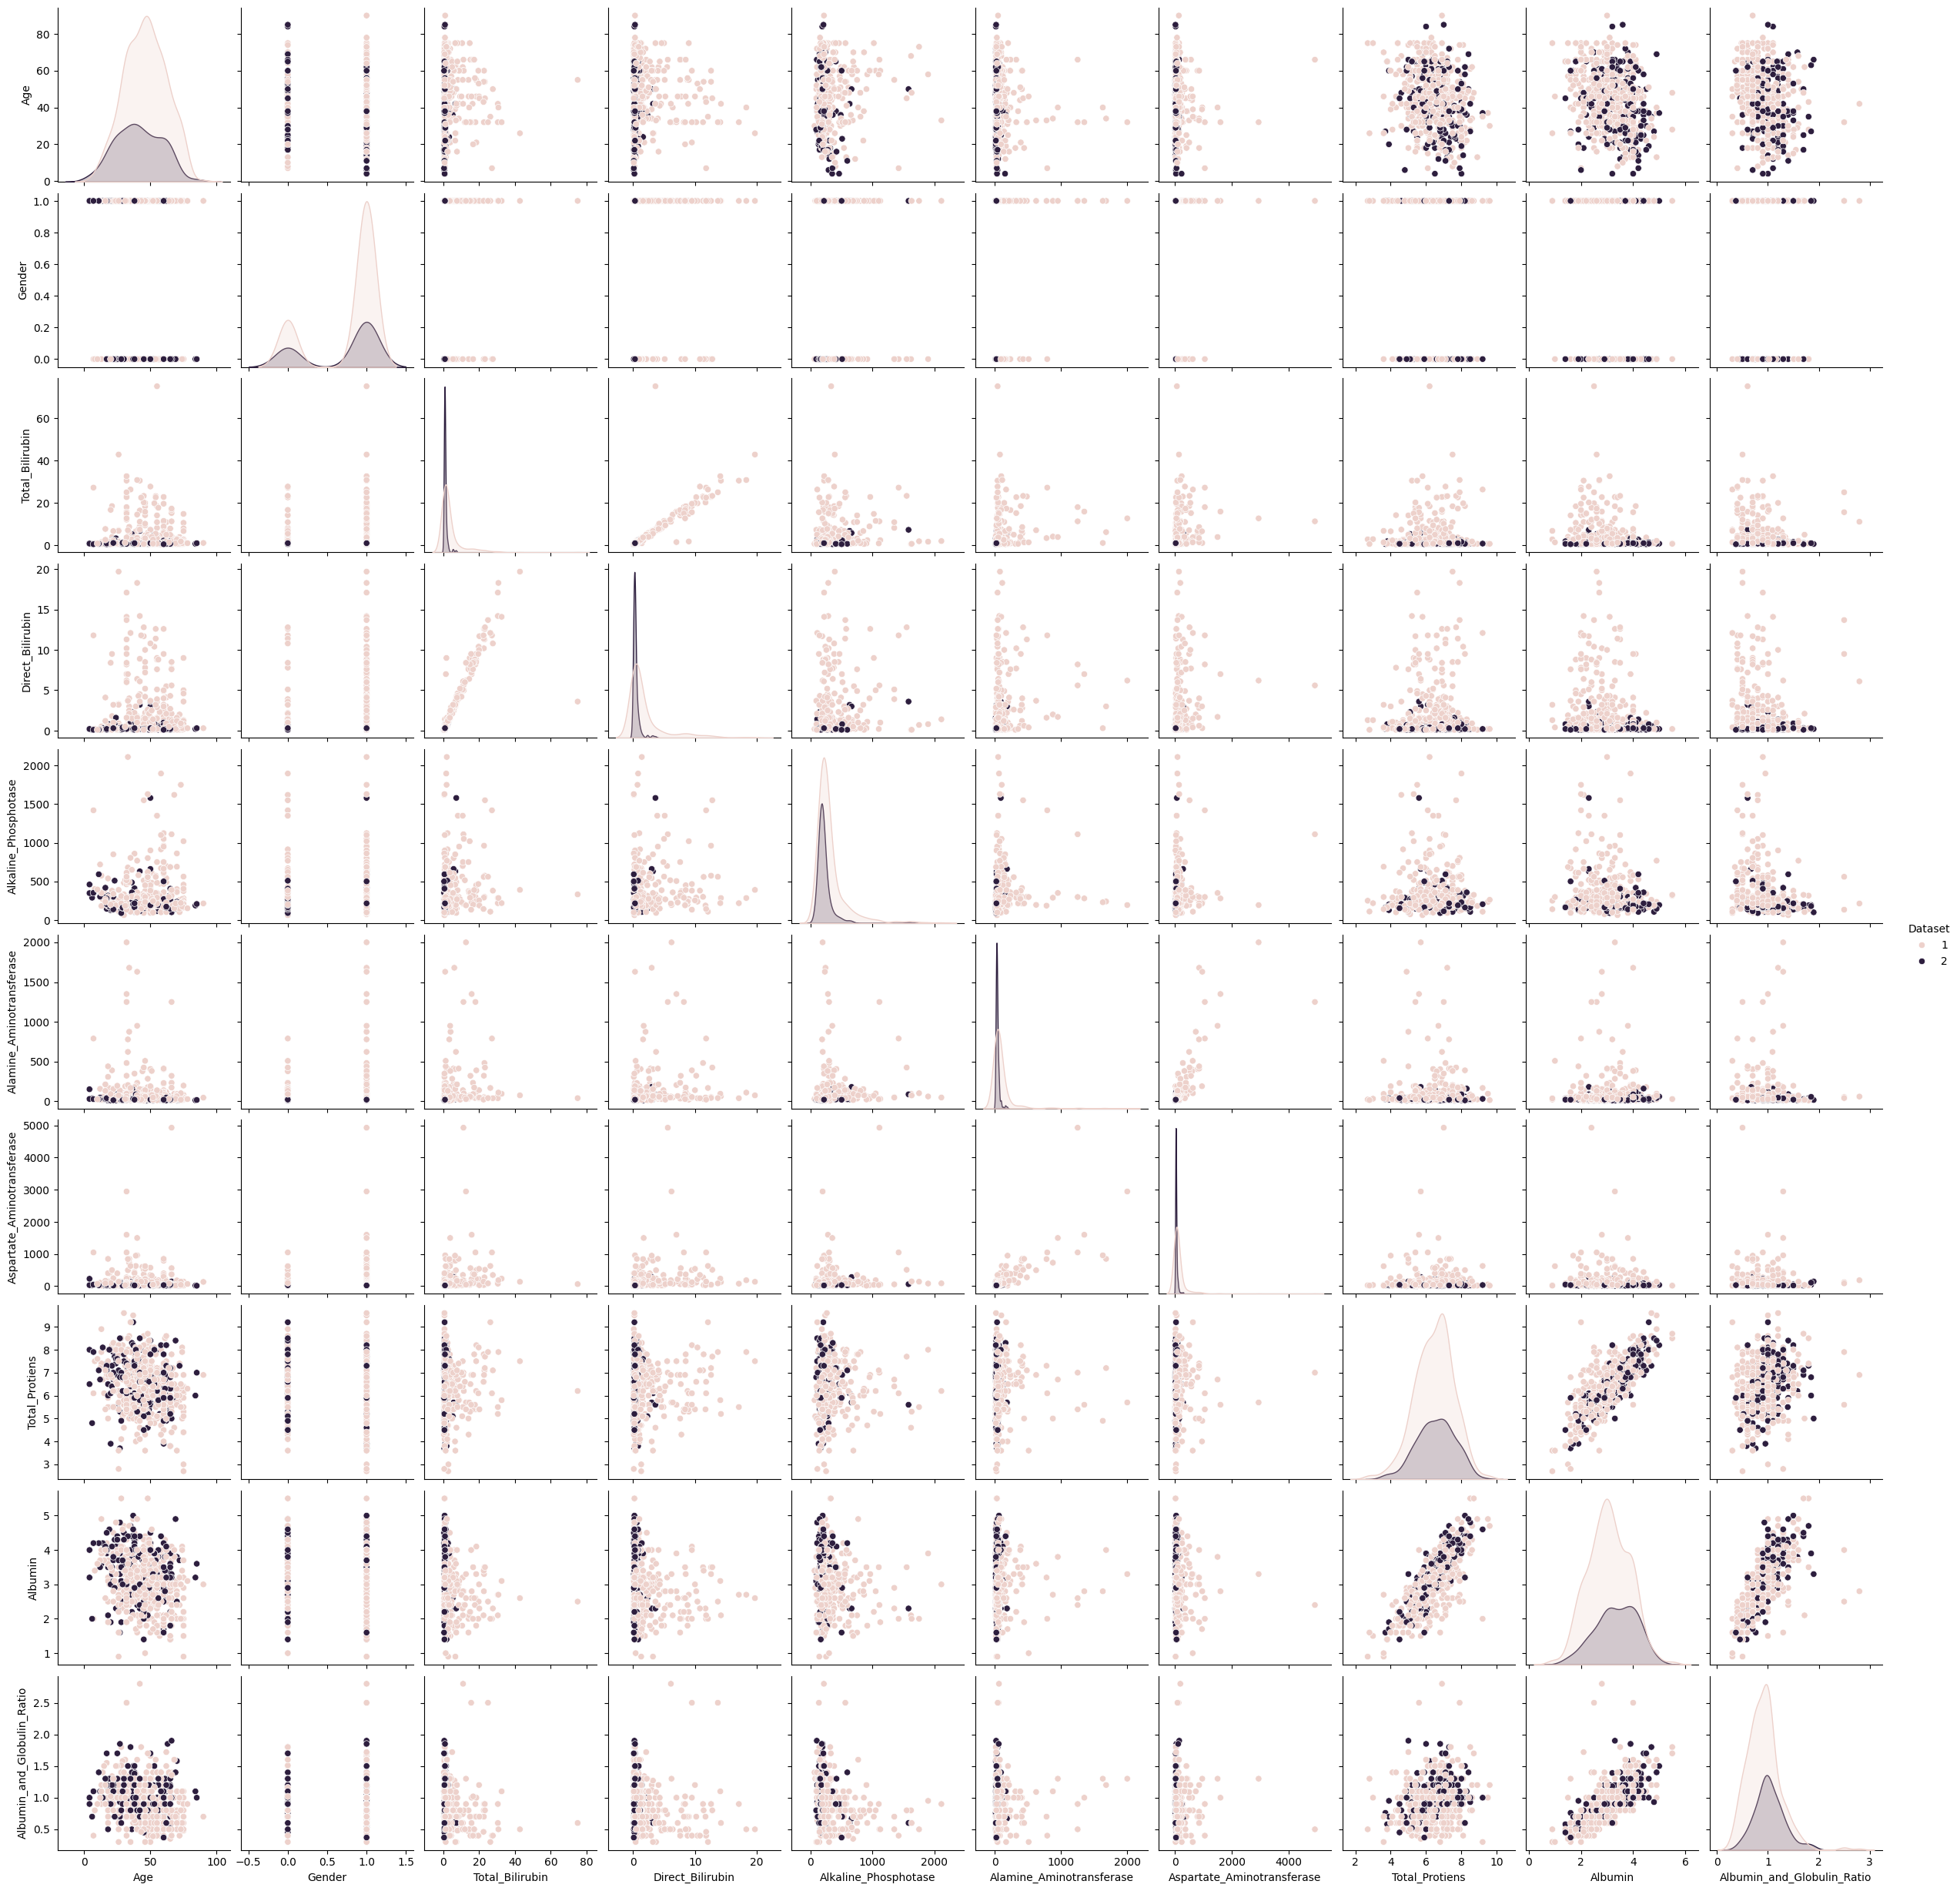

In [19]:
sns.pairplot(df, hue = 'Dataset')

In [20]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin_and_Globulin_Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144


In [71]:
df['Dataset'].value_counts() 

Dataset
1    416
2    167
Name: count, dtype: int64

In [72]:
# Relacing the target column..((2 = 164) - No disease)
df['Dataset'] = df['Dataset'].replace({2: 0})

In [73]:
df['Dataset'].value_counts() # (1=406(liver disease), 0=164 (no disease))

Dataset
1    416
0    167
Name: count, dtype: int64

In [74]:
df.corr(numeric_only=True)['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Total_Protiens               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.162144
Name: Dataset, dtype: float64

In [76]:
# X = df[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = df.drop('Dataset', axis = 1)
y = df['Dataset']

In [77]:
display(X)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [78]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: ylabel='count'>

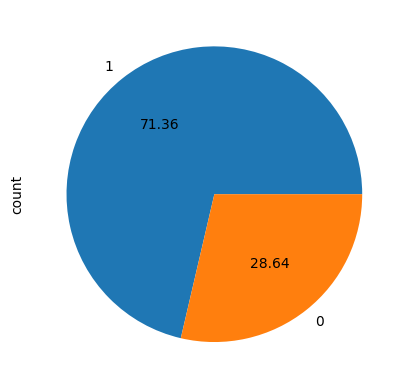

In [80]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

In [81]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

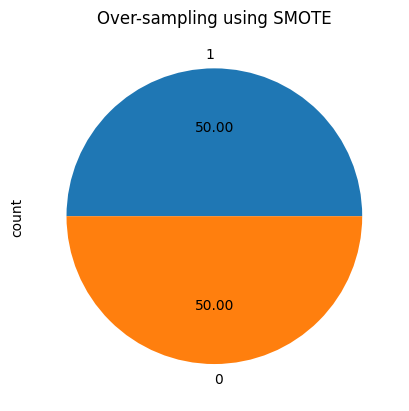

In [82]:
#check the class distribution after applying SMOTE
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling using SMOTE")

In [83]:
model2=LogisticRegression().fit(X_train,y_train)
y_pred1=model2.predict(X_test)

In [84]:
# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)
# Classification report
report = classification_report(y_test, y_pred1)

In [85]:
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Logistic Regression Model Evaluation:
Accuracy: 0.7500
Precision: 0.8485
Recall: 0.5714
F1 Score: 0.6829
Confusion Matrix:
[[100  10]
 [ 42  56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       110
           1       0.85      0.57      0.68        98

    accuracy                           0.75       208
   macro avg       0.78      0.74      0.74       208
weighted avg       0.77      0.75      0.74       208



In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [87]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

print(scaled[:5])

[[0.70930233 0.         0.00402145 0.         0.06057645 0.00301508
  0.00162635 0.5942029  0.52173913 0.24       1.        ]
 [0.6744186  1.         0.14075067 0.2755102  0.31069858 0.02713568
  0.0182964  0.69565217 0.5        0.176      1.        ]
 [0.6744186  1.         0.0924933  0.20408163 0.20859795 0.02512563
  0.01179101 0.62318841 0.52173913 0.236      1.        ]
 [0.62790698 1.         0.0080429  0.01530612 0.05813385 0.00201005
  0.00203293 0.5942029  0.54347826 0.28       1.        ]
 [0.79069767 1.         0.04691689 0.09693878 0.06448461 0.00854271
  0.00996137 0.66666667 0.32608696 0.04       1.        ]]


In [88]:
scaled.min(), scaled.max()

(np.float64(0.0), np.float64(1.0000000000000002))

In [89]:
%pip install imbalanced-learn -q

Note: you may need to restart the kernel to use updated packages.


In [90]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(X, y)

In [91]:
pd.Series(y_resampled).value_counts()

Dataset
1    416
0    416
Name: count, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [93]:
print(y_test)

73     1
550    1
117    1
372    1
216    0
      ..
811    0
135    1
205    1
311    1
134    1
Name: Dataset, Length: 167, dtype: int64


Model 2: Random Forest

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.8024


In [96]:

# Evaluate the random forest regression model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Classification report
report = classification_report(y_test, y_pred_rf)

In [97]:
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.8024
Precision: 0.8507
Recall: 0.7125
F1 Score: 0.7755
Confusion Matrix:
[[77 10]
 [23 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        87
           1       0.85      0.71      0.78        80

    accuracy                           0.80       167
   macro avg       0.81      0.80      0.80       167
weighted avg       0.81      0.80      0.80       167



In [103]:
input=(65,0,0.7,0.1,187,16,18,6.8,3.3,0.90)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)
ld_prediction = rf_model.predict(input_reshaped)
print(ld_prediction)
if (ld_prediction[0] == 0):
  print("The Person does not have liver disease")

else:
  print("The Person has liver disease")

[1]
The Person has liver disease


In [98]:
liv_prediction = rf_model.predict
print(liv_prediction)
print("The Person has chronic kidney disease")

<bound method ForestClassifier.predict of RandomForestClassifier(n_jobs=-1, random_state=42)>
The Person has chronic kidney disease


In [105]:
filename="liver_disease_prediction.pkl"
pickle.dump(rf_model,open(filename,'wb'))